In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#import cartopy.crs as ccrs
import numpy as np
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob
import seaborn as sns
import xarray as xr
#import cartopy as cp
# metos
save_dir = '/uio/hume/student-u89/hannasv/Desktop/figures_MASTERTHESIS/'
era_path = '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/'
# laptop
era_path = '/home/hanna/lagrings/era_interim_data/'
save_dir = '/home/hanna/statsfigs/'

In [5]:
files = glob.glob(era_path + "*_all_cropped.nc")
files

['/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_q_all_cropped.nc',
 '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_tcc_all_cropped.nc',
 '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped.nc',
 '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped.nc',
 '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_sp_all_cropped.nc']

In [5]:
specific_humidity = xr.open_dataset( files[0] )

In [6]:
specific_humidity

<xarray.Dataset>
Dimensions:    (latitude: 35, longitude: 60, time: 8772)
Coordinates:
  * longitude  (longitude) float32 -15.0 -14.25 -13.5 ... 27.75 28.5 29.25
  * latitude   (latitude) float32 55.5 54.75 54.0 53.25 ... 31.5 30.75 30.0
    level      int32 ...
  * time       (time) datetime64[ns] 2012-01-01 ... 2018-01-01T18:00:00
Data variables:
    q          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-26 18:25:57 GMT by grib_to_netcdf-2.12.0: grib_to_n...

Over all the years, min = -4.47e-08, max = 0.02285

In [18]:
files = glob.glob(era_path + "*_r*_all_cropped_*.nc")
files

['/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped_DJF.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped_JJA.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped_MAM.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped_SON.nc']

All seasons have the same min ... and max DFJ = 0.01444, JJA = 0.02285, MAM = 0.01601, SON = 0.0211

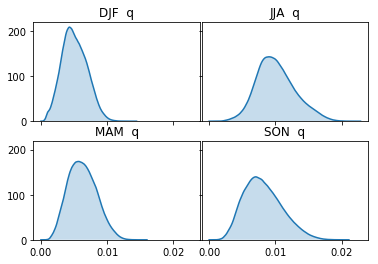

In [10]:
files = glob.glob(era_path + "*q*_all_cropped_*.nc")
titles = ['DJF', 'JJA', 'MAM', 'SON']
fig, axes = plt.subplots(2, 2, sharex = True, sharey=True)
a = axes.ravel()

for i, seasonfile in enumerate(files):
    d = xr.open_dataset( seasonfile )
    x = d.q.values.ravel()
    sns.kdeplot(x, shade=True, cut=0, ax = a[i])
    a[i].set_title(titles[i] + '  q')
    #print(d.min(), d.max())
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)
plt.savefig(save_dir + 'density_seasonal_q.png')
plt.show()

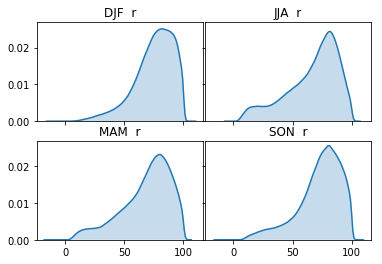

In [11]:
files = glob.glob(era_path + "*_r*_all_cropped_*.nc")
titles = ['DJF', 'JJA', 'MAM', 'SON']
fig, axes = plt.subplots(2, 2, sharex = True, sharey=True)
a = axes.ravel()

for i, seasonfile in enumerate(files):
    d = xr.open_dataset( seasonfile )
    x = d.r.values.ravel()
    sns.kdeplot(x, shade=True, cut=0, ax = a[i])
    a[i].set_title(titles[i] + '  r')
    #print(d.min(), d.max())
plt.subplots_adjust(wspace=0.01, hspace=0.2)
plt.savefig(save_dir + 'density_seasonal_r.png')
plt.show()

['/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped_DJF.nc', '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped_JJA.nc', '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped_MAM.nc', '/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped_SON.nc']


OSError: [Errno -51] NetCDF: Unknown file format: b'/home/hanna/lagrings/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped_SON.nc'

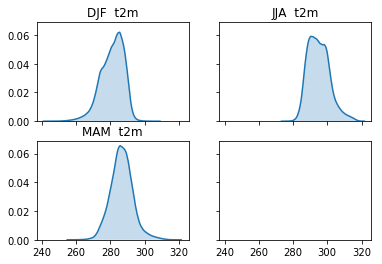

In [14]:
files = glob.glob(era_path + "*_t2m*_all_cropped_*.nc")
print(files)
titles = ['DJF', 'JJA', 'MAM', 'SON']
fig, axes = plt.subplots(2, 2, sharex = True, sharey=True)
a = axes.ravel()

for i, seasonfile in enumerate(files):
    d = xr.open_dataset( seasonfile )
    x = d.t2m.values.ravel()
    sns.kdeplot(x, shade=True, cut=0, ax = a[i])
    a[i].set_title(titles[i] + '  t2m')
    #print(d.min(), d.max())
plt.subplots_adjust(wspace=0.01, hspace=0.2)
plt.savefig(save_dir + 'density_seasonal_t2m.png')

plt.show()

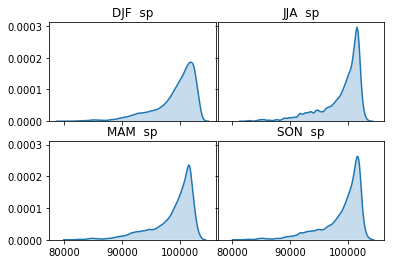

In [13]:
files = glob.glob(era_path + "*_sp*_all_cropped_*.nc")
titles = ['DJF', 'JJA', 'MAM', 'SON']
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
a = axes.ravel()

for i, seasonfile in enumerate(files):
    d = xr.open_dataset( seasonfile )
    x = d.sp.values.ravel()
    sns.kdeplot(x, shade=True, cut=0, ax = a[i])
    a[i].set_title(titles[i] + '  sp')
    #print(d.min(), d.max())
plt.subplots_adjust(wspace=0.01, hspace=0.2)
plt.savefig(save_dir + 'density_seasonal_sp.png')

plt.show()

## To show illustrate initialization 

In [105]:
cmap_r = sns.diverging_palette(145, 280, s=85, l=25, n=100)
cmap_q = sns.diverging_palette(255, 133, l=60, n=100, center="dark")
cmap_t = sns.diverging_palette(10, 220, sep=80, n=100)
cmap_p = sns.color_palette("Paired")

In [106]:
files = glob.glob(era_path + "*_all_cropped.nc")
files

['/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_q_all_cropped.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_tcc_all_cropped.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_t2m_all_cropped.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_r_all_cropped.nc',
 '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/raw_1979-01-01_2018-12-31_sp_all_cropped.nc']

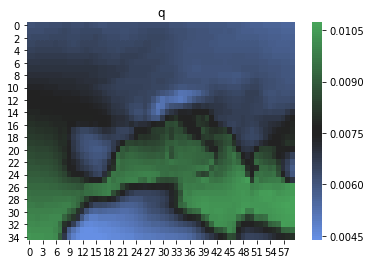

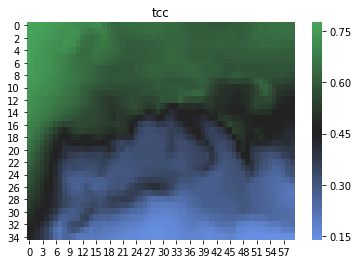

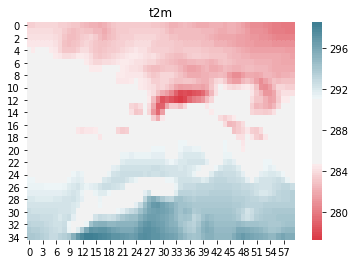

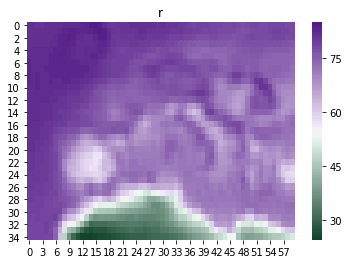

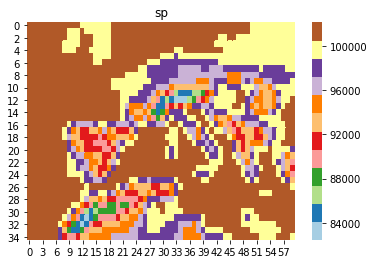

In [107]:
files = glob.glob(era_path + "*_all_cropped.nc")
variables = ['q', 'tcc', 't2m', 'r', 'sp']
cmaps = [cmap_q, cmap_q, cmap_t, cmap_r, cmap_p]

for i, fil in enumerate(files):
    data = xr.open_dataset(fil).mean('time')
    ax = sns.heatmap(data[variables[i]].values, cmap = cmaps[i])
    ax.set_title(variables[i])
    plt.show()

In [108]:
files = glob.glob(era_path + "*_all_cropped.nc")
variables = ['q', 'tcc', 't2m', 'r', 'sp']
dictionary = {}

for i, fil in enumerate(files):
    data = xr.open_dataset(fil).mean('time')
    dictionary[variables[i]] = data[variables[i]].values.ravel()

In [109]:
import pandas as pd

In [110]:
df = pd.DataFrame.from_dict(dictionary)

In [111]:
df.head()

,q,r,sp,t2m,tcc
0,0.006119,81.460297,100969.882812,283.614075,0.774874
1,0.006141,81.386749,100991.937500,283.670624,0.770434
2,0.006165,81.228889,101014.367188,283.743561,0.766472
3,0.006187,81.199333,101015.070312,283.766357,0.762796
4,0.006207,81.365936,101038.734375,283.755096,0.756963


In [112]:
df1 = df[['r', 'q']]
df1.corr()

,r,q
r,1.000000,0.200882
q,0.200882,1.000000


## Linear correlations

In [95]:
df.corr()

,q,r,sp,t2m,tcc
q,1.000000,0.200882,0.487843,0.575663,-0.430477
r,0.200882,1.000000,0.406336,-0.637145,0.752423
sp,0.487843,0.406336,1.000000,0.150240,0.138283
t2m,0.575663,-0.637145,0.150240,1.000000,-0.857096
tcc,-0.430477,0.752423,0.138283,-0.857096,1.000000


# Multimodal distribution

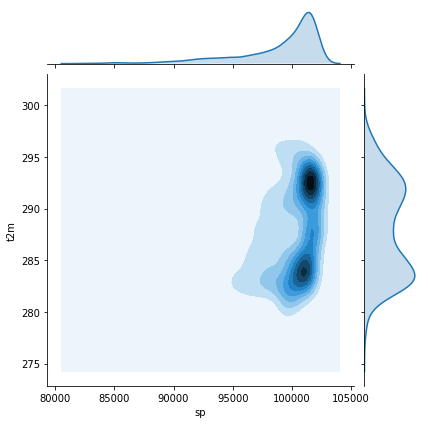

In [113]:
sns.jointplot(x="sp", y="t2m", data=df, kind="kde");